# นายพัสสน แซ่โจว 64543206037-6

In [26]:
import pandas as pd

#features: ตั้งครรภ์, ระดับกลูโคส, ความดันโลหิต, ความหนาของผิว, อินซูลิน, body-mass index
#ปัจจัยเรื่องกรรมพันธุ์, อายุ, เป็นเบาหวาน?

df = pd.read_csv('diabetes.csv')
df.describe() #สรุปสถิติ


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

#features: ตั้งครรภ์, ระดับกลูโคส, ความดันโลหิต, ความหนาของผิว, อินซูลิน, body-mass index
#ปัจจัยเรื่องกรรมพันธุ์, อายุ, เป็นเบาหวาน?

df = pd.read_csv('diabetes.csv')
df.describe() #สรุปสถิติ

#clean ข้อมูล (เช่น BP=0, insulin=0,... >> missing data)
df[df.Glucose == 0]
df[df.SkinThickness == 0]

#mean imputation: เติมข้อมูลที่หายด้วย mean
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols:
    df[c] = df[c].replace(0, np.NaN) #แปลง 0 เป็น NaN เพื่อให้ mean ไม่คิด
    mean = df[c].mean() #หาค่าเฉลี่ยคอลัมน์
    df[c] = df[c].replace(np.NaN, mean) #mean impute

X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
svm = LinearSVC(max_iter = 50000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = np.mean(y_pred == y_test)
acc

C:\Users\LONG\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7597402597402597

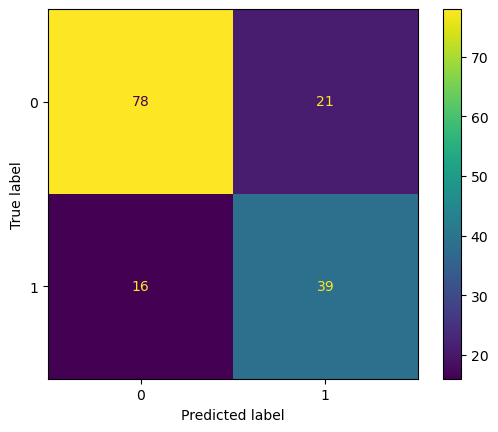

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = svm.classes_)
#plot_confusion_matrix(svm,X_test,y_test)
disp.plot()

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
